In [57]:
import numpy as np
import matplotlib.pyplot as plt
import spectra as s
import scipy.constants as consts
import scipy.signal as sig

## Get mean of galactic pointed data

In [58]:
mean = np.load('GALACTIC/GALACTICmean.npz')['data']

<IPython.core.display.Javascript object>


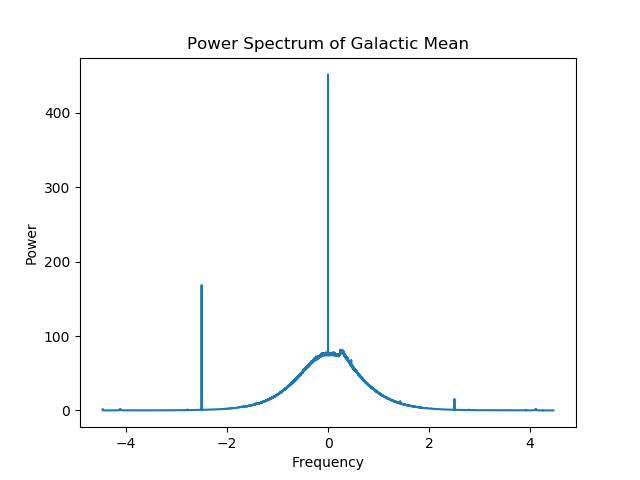

In [60]:
s.plot_power(mean, 'Galactic Mean')

## Get Line Shape Calibration

In [61]:
soff = np.load('soff.npz')['data']

In [62]:
line = mean/soff

<IPython.core.display.Javascript object>


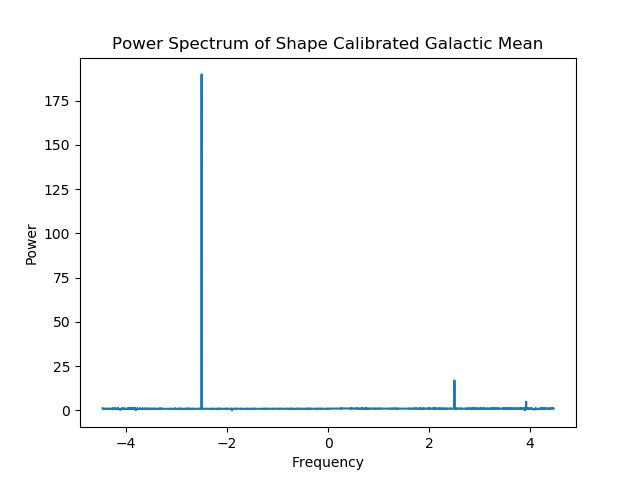

In [63]:
%matplotlib notebook
s.plot_power(line, 'Shape Calibrated Galactic Mean')

In [64]:
scal = np.load('scal.npz')['data']
scold = np.load('scold.npz')['data']

<IPython.core.display.Javascript object>


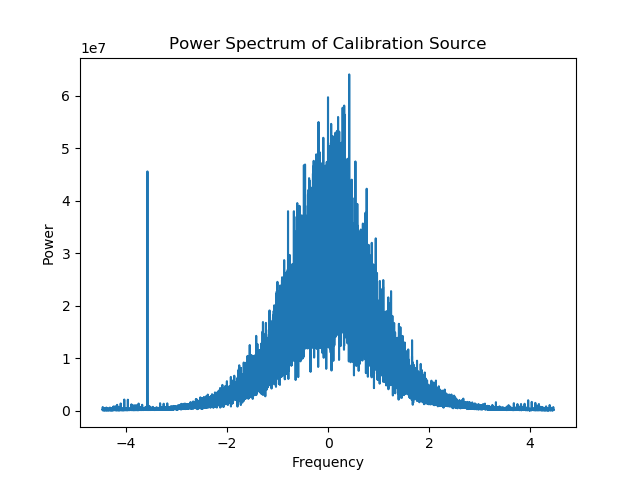

In [65]:
s.plot_power(scal, 'Calibration Source')

In [66]:
G = s.gain(300, scal, scold)
G

182.18251393759849

In [67]:
line = G*line

<IPython.core.display.Javascript object>


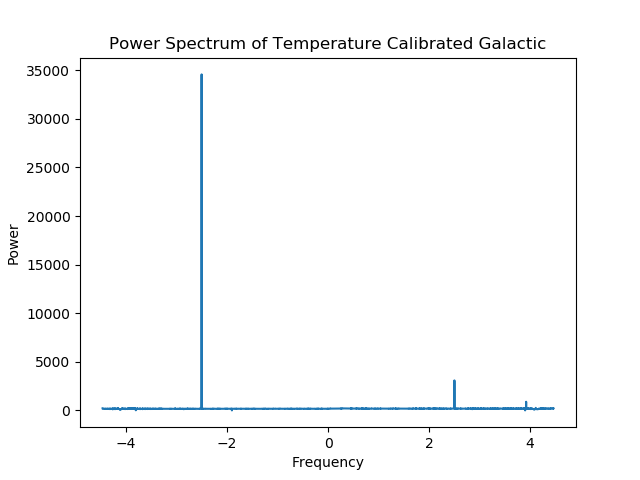

In [68]:
s.plot_power(line, 'Temperature Calibrated Galactic')

In [69]:
freqs = np.fft.fftfreq(len(line), 7/62.5)
print(min(freqs), max(freqs))

-4.46428571429 4.46372767857


### Now going to rf frequency, focusing on positive frequencies

In [70]:
positivevals = line[:int(len(line)/2)]
positivefreqs = freqs[:int(len(freqs)/2)]

<IPython.core.display.Javascript object>


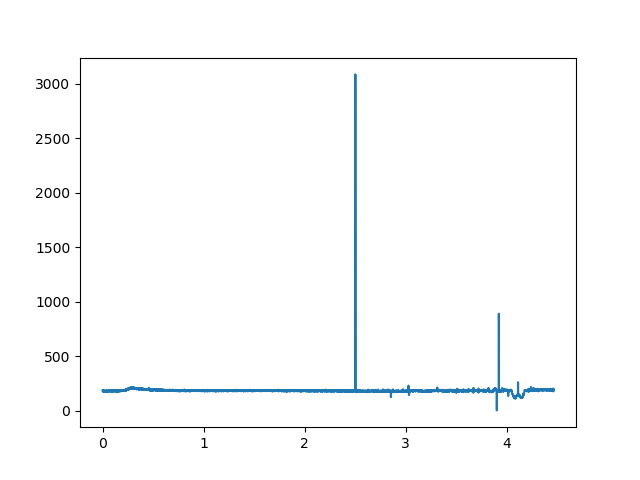

In [71]:
plt.plot(positivefreqs, positivevals)
plt.show()

## Need to get appropriate frequency array values

In [101]:
conversion = 1230+190
rf = positivefreqs+conversion

<IPython.core.display.Javascript object>


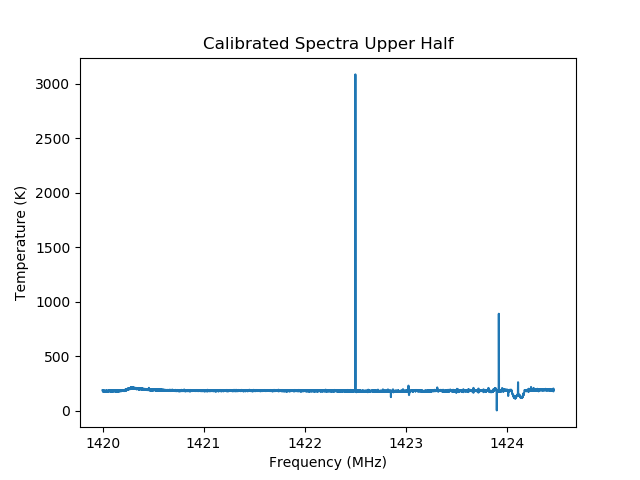

In [105]:
plt.plot(rf, positivevals)
plt.title('Calibrated Spectra Upper Half')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.show()

In [106]:
v0 = 1420.4 #MHz
deltaf = rf - v0
v = -consts.c*deltaf/v0

<IPython.core.display.Javascript object>


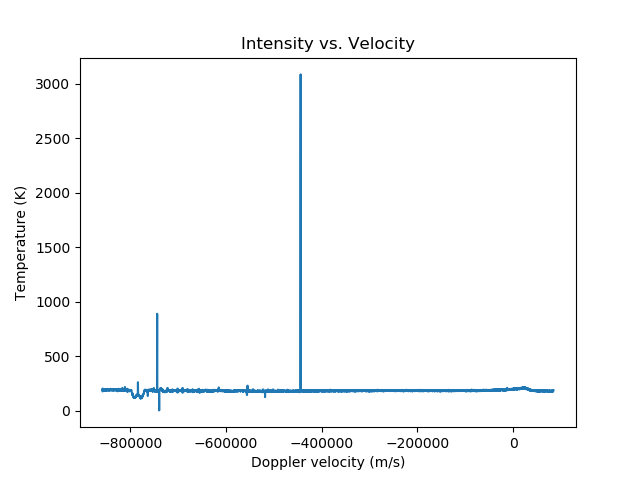

In [107]:
plt.plot(v, positivevals)
plt.title("Intensity vs. Velocity")
plt.xlabel("Doppler velocity (m/s)")
plt.ylabel("Temperature (K)")
plt.show()

In [116]:
data = positivevals
freqs = rf
data = np.array_split(data, 800)
data = [np.mean(i) for i in data]
freqs = np.array_split(freqs, 800)
freqs = [np.mean(i) for i in freqs]

<IPython.core.display.Javascript object>


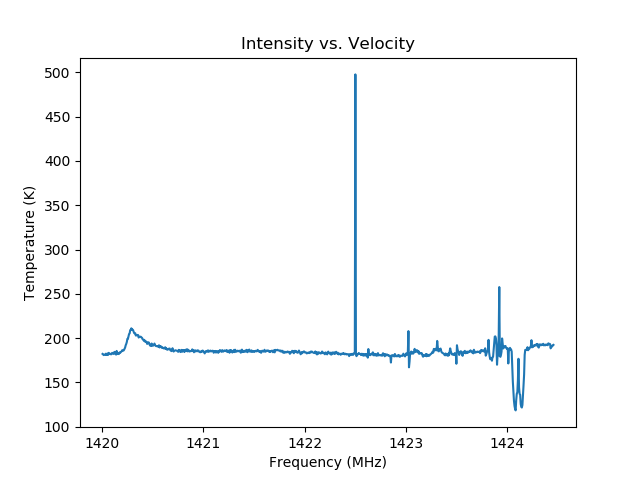

In [117]:
plt.plot(freqs, data)
plt.title("Intensity vs. Velocity")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Temperature (K)")
plt.show()

In [118]:
v0 = 1420.4 #MHz
deltaf = np.array(freqs) - v0
v = -consts.c*deltaf/v0

In [119]:
len(v)

800

### Used ugradio.doppler.get_projected_velocty via terminal to get the telescope velocity relative to the Local Standard of Rest (LSR)

In [120]:
LSR = -16698.39216337 #m/s

<IPython.core.display.Javascript object>


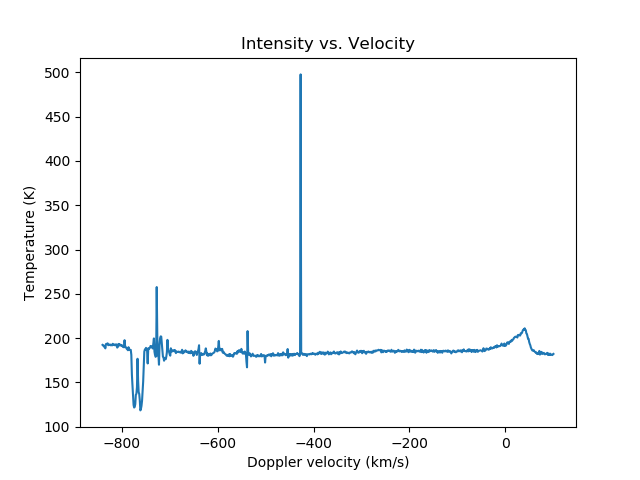

In [121]:
plt.plot((v-LSR)/1000, data)
plt.title("Intensity vs. Velocity")
plt.xlabel("Doppler velocity (km/s)")
plt.ylabel("Temperature (K)")
plt.show()

In [122]:
v = v[np.where(v>-400000)]

In [123]:
len(v)

411

In [124]:
data = np.array(data)[np.where(v>-400000)]

In [125]:
len(data)

411

<IPython.core.display.Javascript object>


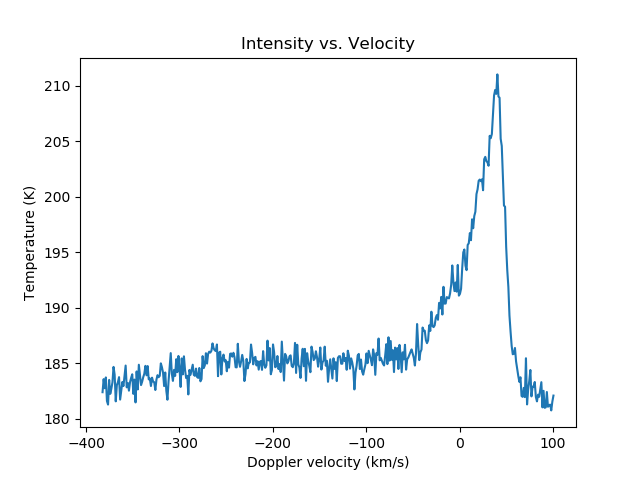

In [126]:
plt.plot((v-LSR)/1000, data)
plt.title("Intensity vs. Velocity")
plt.xlabel("Doppler velocity (km/s)")
plt.ylabel("Temperature (K)")
plt.show()

Gaussian fit parameters: <br>
Narrow: amp: 21.841, avg: 29.867, sigma: 19.023 <br>
Broad: amp: 185.986, avg: -1439.119, sigma: 1156.1945

In [127]:
gaussparams = np.load('narrowgauss.npz')['data']

In [128]:
broadgauss = np.load('broadgauss.npz')['data']

In [136]:
gaussvals = np.load("Gaussfityvals.npz")['data']

<IPython.core.display.Javascript object>


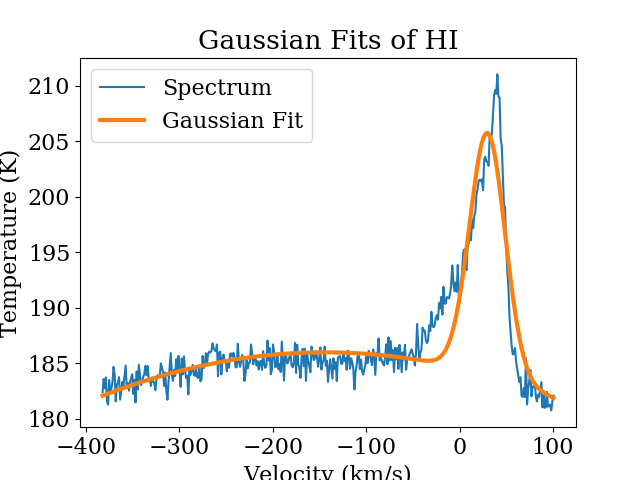

In [143]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'


plt.plot((v-LSR)/1000, data, linewidth = 1.5, label = 'Spectrum')
plt.plot(((v-LSR)/1000), gaussvals, linewidth = 3, label = 'Gaussian Fit')
#plt.plot((v-LSR)/1000, gaussparams, linewidth=3)
plt.title('Gaussian Fits of HI')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.savefig('GaussianFits.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


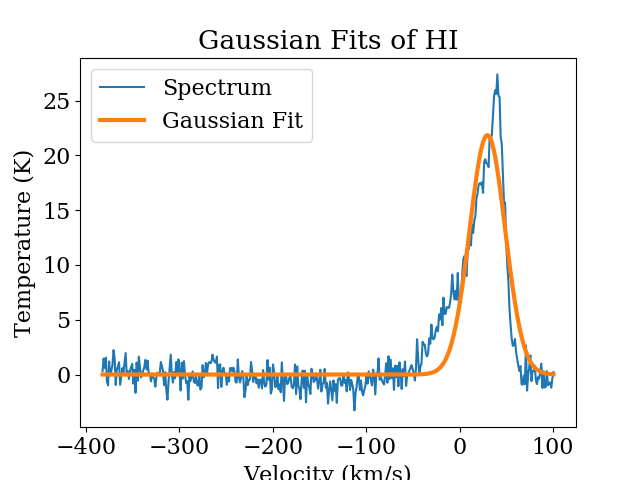

In [149]:
plt.plot((v-LSR)/1000, data-broadgauss, linewidth = 1.5, label = 'Spectrum')
plt.plot(((v-LSR)/1000), gaussparams, linewidth = 3, label = 'Gaussian Fit')
plt.title('Gaussian Fits of HI')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.savefig('FinalSpec.pdf', bbox_inches='tight')